### 【 데이터 분포 시각화 및 형태 확인 】
- 분포 시각화 : 히스토그램
- 형태 수치화 : 왜도(skew)-쏠림정도, 첨도(kurt)-뽀족함 정도


[1] 데이터 분포 확인 및 시각화 <hr>

In [4]:
## ============================================================
## 모듈 로딩
## ============================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
from scipy.stats import skew, kurtosis ## 왜도/첨도 계산용 함수

In [7]:
## ============================================================
## 예제 데이터 만들기
## ============================================================
## 데이터 재현성 설정
np.random.seed(42)

## 표준정규분포(평균0, 표준편차1)에 가까운 예제 데이터 1000개
data_normal = np.random.normal(loc=0, scale=1, size=1000)

## 오른쪽으로 긴 꼬리를 가진 치우친 데이터 (지수분포)
data_skewed = np.random.exponential(scale=1, size=1000)

## pandas Series로 변환
normalSR = pd.Series(data_normal, name='normal')
skewedSR = pd.Series(data_skewed, name='skewed')

In [8]:
## ===============================================================
## 왜도, 첨도 계산
## => 데이터 형태/분포/쏠림정도 체크
## => scipy.stats.skew, kurtosis
##    pandas SR/DF.skew(), SR/DR.kurt()
## ================================================================
def print_stats(series):
    ## ndarray 타입
    x = series.values

    ## 평균, 표준편차(ddof=1 불편분산, 표본 데이터이기 때문)
    mean = x.mean()
    std = x.std(ddof=1)

    ## 왜도 (skewness) : 비대칭 정도
    sk = skew(x, bias=False) ## bias=False : 표본 기준 불편추정

    ## 첨도 (kurtosis) : 뾰족 정도 -> 이상치 체크
    ku = kurtosis(x, fisher=True, bias=False)
    # - fisher=True : 정규분포 기준 0이 되도록(초과첨도, excess kurtosis)
    # - fisher=False : 정규분포 기준 3

    print(f'=== {series.name} 데이터 통계 ===')
    print(f'개수 : {len(x)}')
    print(f'평균 : {mean:.3f}')
    print(f'표준편차 : {std:.3f}')
    print(f'왜도 : {sk:.3f}')
    print(f'첨도(초과) : {ku:.3f} (정규분포는 0 근처)')
    print()



print_stats(normalSR)
print_stats(skewedSR)

=== normal 데이터 통계 ===
개수 : 1000
평균 : 0.019
표준편차 : 0.979
왜도 : 0.117
첨도(초과) : 0.073 (정규분포는 0 근처)

=== skewed 데이터 통계 ===
개수 : 1000
평균 : 1.008
표준편차 : 1.003
왜도 : 1.984
첨도(초과) : 5.412 (정규분포는 0 근처)



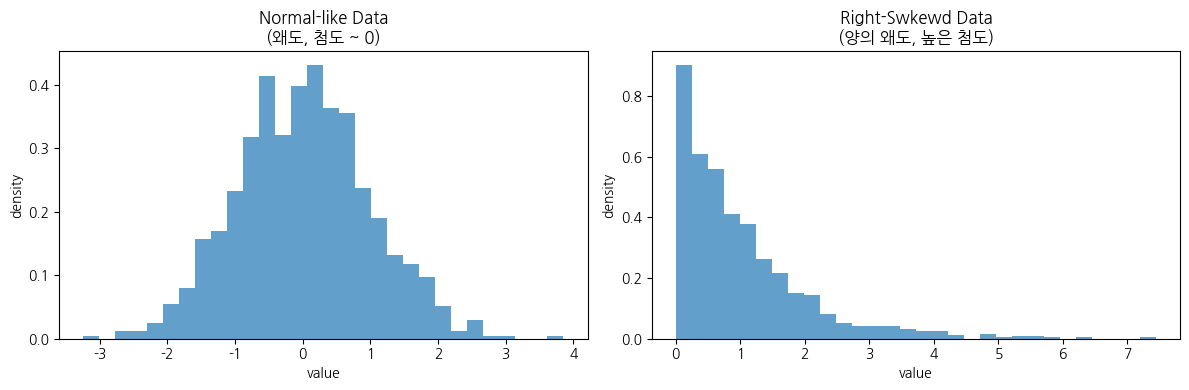

In [9]:
## ================================================
## 데이터 분포 시각화 - 히스토그램
## ================================================
fig, axes = plt.subplots(1,2, figsize=(12,4))

##- 정규분포 데이터 히스토그램
axes[0].hist(normalSR, bins=30, density=True, alpha=0.7)
axes[0].set_title("Normal-like Data\n(왜도, 첨도 ~ 0)")
axes[0].set_xlabel("value")
axes[0].set_ylabel("density")

##- 치우친 데이터 히스토그램
axes[1].hist(skewedSR, bins=30, density=True, alpha=0.7)
axes[1].set_title("Right-Swkewd Data\n(양의 왜도, 높은 첨도)")
axes[1].set_xlabel("value")
axes[1].set_ylabel("density")

plt.tight_layout()
plt.show()